# Analysis of expert estimates COVID-19 deaths in the USA

It's time for the USA to get very serious about the threat that COVID-19 poses to the country.

Fivethirtyeight [recently reported](https://fivethirtyeight.com/features/infectious-disease-experts-dont-know-how-bad-the-coronavirus-is-going-to-get-either/) on a [survey](https://works.bepress.com/mcandrew/2/) of experts who were asked several questions on 16-17 March. Among those questions (paraphrased):

1. How many cases of COVID-19 do you expect will be reported in the US by March 23, 2020? (a week from the survey date)
2. How many Americans will die of COVID-19 in 2020?

It is now after March 23. The methodology I will follow below is to use the error in the answer to the first question as an estimate of the error in the answer to the second question. Now, this approach is far from perfect. There are plenty of reasons that the error in the estimate of the number of cases might not be correlated with the error in the death estimates. But I want to call attention to the threat this poses.

Furthermore, let me be very clear that I do not in any way mean any sort of attack or disrespect to the experts who participated in that survey. Indeed, I recommend reading the Fivethirtyeight article, which eloquently explains that even experts are dealing with a great deal of uncertainty and working with imperfect information. I have nothing but respect and appreciation for these experts, who are kind enough to share their informed opinions with us at a time when we're all pretty concerned.

The stuff below will include the entire process I use (full transparency, down to the details of the code I write). For those of you only interested in the headline numbers:

* One would hope that actual results would be around the 50th percentile of expert estimates. The would mean that half of experts guessed too high, and half guessed too low. In this case, it was at the 98th percentile (far above the typical expert prediction). That means that only 2 out of 100 experts would have expected we'd face the actual number of cases or more.
* Extrapolating that to number of COVID-19 deaths in the USA in 2020, that would imply that around 2.3 million Americans will die from this. But that's based on assuming these experts are equally wrong about this number. And there is still plenty we can do to reduce the number of deaths. Strict adherence to physical distancing is one of the best things you can do to help accomplish that.

Caveats: As stated previously, there's no specific reason to assume that the error in death estimates is correlated to the error in estimated cases. Furthermore, because the experts so strongly underestimated the number of cases, the death estimates come from extrapolating from the tails of distributions, which means that the numbers are extremely sensitive. If the values were around 95th percentile instead of 98th, that would shift the number of deaths by over half a million.

Details on the extrapolation are in the `PercentileExtrapolator` class in `extrapolator.py`.

## Baseline: Estimates of the number of US cases on 23 March

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from extrapolator import PercentileExtrapolator
matplotlib.rcParams['font.size'] = 12

# data from https://works.bepress.com/mcandrew/2/
predictions = [0.13, 0.29, 0.24, 0.10, 0.05, 0.04]
bins = [(5000 + i*2500, 5000 + (i+1)*2500) for i in range(len(predictions))]

# show the bins and associated prediction values
{b: d for b, d in zip(bins + [(20000, float('inf'))],
                      predictions + [1 - sum(predictions)])}

{(5000, 7500): 0.13,
 (7500, 10000): 0.29,
 (10000, 12500): 0.24,
 (12500, 15000): 0.1,
 (15000, 17500): 0.05,
 (17500, 20000): 0.04,
 (20000, inf): 0.15000000000000002}

In [2]:
# Actual US cases through 23 March. Data from: https://covidtracking.com/us-daily/
actual_cases = 42164

In [3]:
cases = PercentileExtrapolator(bins, predictions)
percentile = cases(actual_cases)
percentile

0.9858957623596923

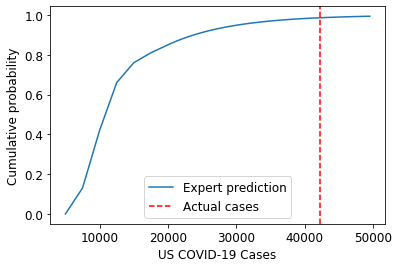

In [4]:
xvals = np.arange(5000, 50000, 500)
plt.plot(xvals, [cases(x) for x in xvals], label="Expert prediction");
plt.xlabel("US COVID-19 Cases")
plt.ylabel("Cumulative probability")
plt.axvline(actual_cases, color='r', linestyle='--', label="Actual cases")
plt.legend();
plt.savefig("cases.svg")

Let me explain how to read that chart. The x-axis gives the number of COVID-19 cases predicted for March 23. The y-value at a given x-value gives the fraction of experts who expected fewer cases than that. For example, 15000 cases corresponds to a cumulative probability of around 0.75. That means that 75% of experts thought we'd have fewer that 15000 cases in the US; only 25% of experts thought we'd have more.

The actual number of cases corresponds to a value of over 0.98. This means that over 98% of experts thought we'd see fewer cases than we actually did, and fewer than 2% that we'd see this many or more.

## Extrapolation: What if the experts are equally wrong about deaths?

In [5]:
death_prob = [0.36, 0.25, 0.12, 0.13, 0.07, 0.06]
death_count = [0, 100000, 300000, 500000, 1000000, 1500000, float('inf')]
death_bins = [(death_count[i], death_count[i+1]) for i in range(len(death_count)-1)]

{b: p for b, p in zip(death_bins, death_prob)}

{(0, 100000): 0.36,
 (100000, 300000): 0.25,
 (300000, 500000): 0.12,
 (500000, 1000000): 0.13,
 (1000000, 1500000): 0.07,
 (1500000, inf): 0.06}

In [6]:
deaths = PercentileExtrapolator(death_bins[:-1], death_prob[:-1])

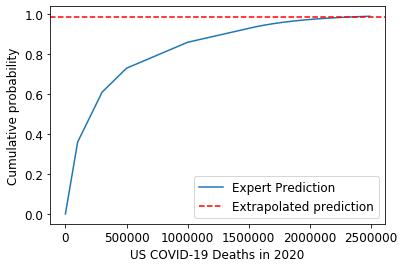

In [7]:
xvals = np.arange(0, 2500000, 10000)
plt.plot(xvals, [deaths(x) for x in xvals], label='Expert Prediction')
plt.xlabel("US COVID-19 Deaths in 2020")
plt.axhline(percentile, color='r', linestyle='--', label='Extrapolated prediction')
plt.ylabel("Cumulative probability")
plt.legend();
plt.savefig("deaths.svg")

This plot is just like the previous one. The number of deaths is along the x-axis, and the y-axis represents the fraction of experts who predict fewer deaths than that number. The "average" expert (cumulative probability of 0.5) predicts about 200,000 US deaths, as the Fivethirtyeight article said.

The red dashed line marks the percentile for the error in estimates of confirmed cases. It intersects the expert predictions at around 2.3 million deaths. I caution against taking this as a serious predictor of the number of deaths the US will face, but I believe this does suggest that the situation should be taken very seriously.

In [8]:
deaths.invert(percentile)  # this is the key number

2302000